In [1]:
import sklearn
import pandas
import seaborn 
import matplotlib

In [2]:
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
games=pandas.read_csv(r"C:\Users\om\Downloads\scrapers-master\games.csv")

In [4]:
print(games.columns)
print(games.shape)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')
(81312, 20)


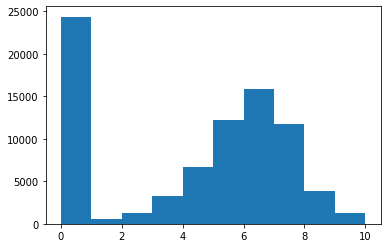

In [5]:
plt.hist(games["average_rating"])
plt.show()

In [6]:
#print the first row of all the games with zero scores
print(games[games["average_rating"]==0].iloc[0])

#print the first row of the games with score greater tha 0
print(games[games["average_rating"]>0].iloc[0])

id                             318
type                     boardgame
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 13048, dtype: object
id                                  12333
type                            boardgame
name                    Twilight Struggle
yearpublished                        2005
minplayers                              2
maxplayers                              2
playingtime          

<function matplotlib.pyplot.show(*args, **kw)>

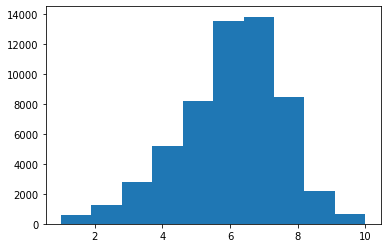

In [7]:
#remove any rows without user review
games=games[games["users_rated"]>0]

#remove any rows with missing values
games=games.dropna(axis=0)

plt.hist(games["average_rating"])
plt.show

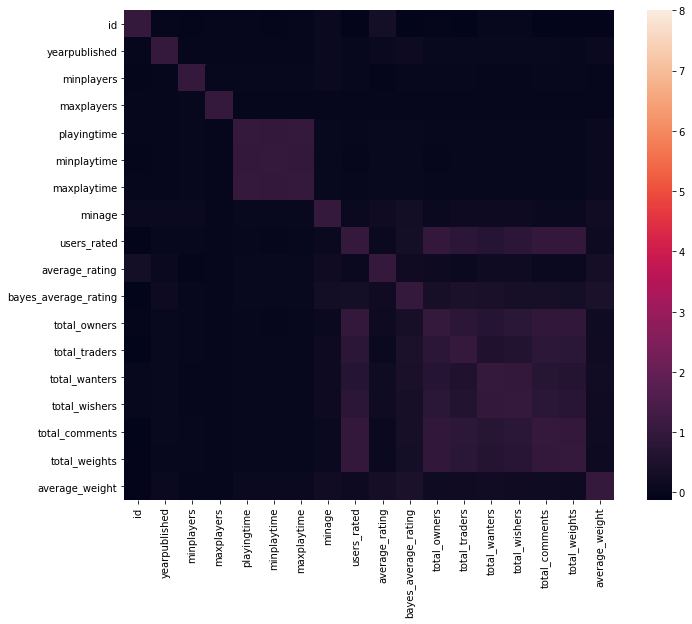

In [8]:
#correaltion matrix
cormat=games.corr()
fig=plt.figure(figsize=(12,9))

sns.heatmap(cormat,vmax=8,square=True)
plt.show()

In [9]:
#Get all the columns from dataframe
columns=games.columns.tolist()

#Filter the columns to remove data we do not want
columns=[c for c in columns if c not in ["bayes_average_rating","average_rating","type","name","id"]]

#store the variable we will be predicting on
target="average_rating"

In [10]:
from sklearn.model_selection import train_test_split

train=games.sample(frac=0.8,random_state=1)
#select anything not in train set and put in test set
test=games.loc[~games.index.isin(train.index)]

print(train.shape)
print(test.shape)

(45515, 20)
(11379, 20)


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#initialize Linear model
LR=LinearRegression()

#fit the data in model
LR.fit(train[columns],train[target])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
#generate the prediction for the test set
predictions=LR.predict(test[columns])

#compute the error between our test predction and actual values
mean_squared_error(predictions,test[target])

2.078819032629325

In [13]:
from sklearn.ensemble import RandomForestRegressor
#inintialize the model
RFR=RandomForestRegressor(n_estimators=100,min_samples_leaf=10,random_state=1)

#ffit the data in model
RFR.fit(train[columns],train[target])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [14]:
#generate the prediction for the test set
predictions=RFR.predict(test[columns])

#compute the error between our test predction and actual values
mean_squared_error(predictions,test[target])

1.4458560046071653

In [15]:
test[columns].iloc[0]

yearpublished      2011.0000
minplayers            2.0000
maxplayers            6.0000
playingtime         200.0000
minplaytime          60.0000
maxplaytime         200.0000
minage               14.0000
users_rated       15709.0000
total_owners      17611.0000
total_traders       273.0000
total_wanters      1108.0000
total_wishers      5581.0000
total_comments     3188.0000
total_weights      1486.0000
average_weight        3.6359
Name: 9, dtype: float64

In [16]:
#making prediction of aparticular one in both models
ratin_LR=LR.predict(test[columns].iloc[0].values.reshape(1,-1))
ratin_RFR=RFR.predict(test[columns].iloc[0].values.reshape(1,-1))

print(ratin_LR)
print(ratin_RFR)

[8.12061283]
[7.91373581]


In [17]:
test[target].iloc[0]

8.07933